In [ ]:
!pip install pymysql
import pymysql
import pandas as pd
import numpy as np
from google.colab import data_table

In [ ]:
data_table.enable_dataframe_formatter()
cnx = pymysql.connect(user='buspark', password='U@5p1r3!',
                              host='masscourtsplus.org',
                              database='wp_courtdocs')


cursor = cnx.cursor()

In [ ]:
from google.colab import files

# **Table Previews and Data Cleaning**

## **cdocs_case_action_index**

In [ ]:
query = """
SELECT *
FROM cdocs_case_action_index
LIMIT 100;
"""
df = pd.read_sql(query, cnx)

# Display the DataFrame

# Save the DataFrame to a CSV file
df.to_csv("cdocs_case_action_index.csv", index=False)
files.download("cdocs_case_action_index.csv")
df

In [ ]:
import pymysql
import pandas as pd

cnx = pymysql.connect(user='buspark', password='U@5p1r3!',
                      host='masscourtsplus.org',
                      database='wp_courtdocs')

try:
    with cnx.cursor() as cursor:
        query = """
        SELECT case_id, action, description
        FROM cdocs_case_action_index
        WHERE description REGEXP '\\$?[0-9]{1,4}(,[0-9]{3})*(\\.00)?( dollars)?'
        AND NOT (
            description LIKE '%over %'
            OR description LIKE '%more than %'
        );
        """
        cursor.execute(query)
        results = cursor.fetchall()

        # Convert the results into a DataFrame
        df = pd.DataFrame(results, columns=['Case ID', 'Action', 'Description'])

        # Display the DataFrame
        print(df.head())
finally:
    cnx.close()

In [ ]:
import pymysql
import pandas as pd

cnx = pymysql.connect(user='buspark', password='U@5p1r3!',
                      host='masscourtsplus.org',
                      database='wp_courtdocs')

try:
    with cnx.cursor() as cursor:
        query = """
        SELECT case_id, action
        FROM cdocs_case_action_index
        WHERE action LIKE '%wage garnish%'
           OR action LIKE '%wages garnished%'
           OR description LIKE '%wage garnish%'
           OR description LIKE '%wages garnished%'
           OR action LIKE '%garnishment%'
           OR description LIKE '%garnishment%';
        """
        cursor.execute(query)
        # Fetching all matching rows
        rows = cursor.fetchall()

        # Converting to a DataFrame for easier viewing and analysis
        df = pd.DataFrame(rows, columns=['Case ID', 'Action'])

        # Displaying the DataFrame
        print(df)

finally:
    cnx.close()

In [ ]:
import pymysql
import pandas as pd
import matplotlib.pyplot as plt

cnx = pymysql.connect(user='buspark', password='U@5p1r3!',
                      host='masscourtsplus.org',
                      database='wp_courtdocs')
try:
    with cnx.cursor() as cursor:
        # Query to count the total number of cases
        total_query = "SELECT COUNT(*) FROM cdocs_case_action_index"
        cursor.execute(total_query)
        total_cases = cursor.fetchone()[0]
finally:
    cnx.close()

wage_garnishment_cases = len(df)

# Calculating the number of other cases
other_cases = total_cases - wage_garnishment_cases

# Data for plotting
categories = ['Wage Garnishment Cases', 'Other Cases']
values = [wage_garnishment_cases, other_cases]

# Creating the bar plot
plt.figure(figsize=(10, 6))
plt.bar(categories, values, color=['skyblue', 'lightgreen'])
plt.xlabel('Case Type', fontsize=14)
plt.ylabel('Number of Cases', fontsize=14)
plt.title('Comparison of Wage Garnishment Cases vs. All Other Cases', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adding value labels on top of each bar
for i, value in enumerate(values):
    plt.text(i, value, str(value), ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

In [ ]:
import pymysql
import pandas as pd

cnx = pymysql.connect(user='buspark', password='U@5p1r3!',
                      host='masscourtsplus.org',
                      database='wp_courtdocs')

try:
    with cnx.cursor() as cursor:
        # SQL query to find cases related to lifting wage garnishment
        query = """
        SELECT case_id, action, description
        FROM cdocs_case_action_index
        WHERE (action LIKE '%lifting wage garnish%' OR description LIKE '%lifting wage garnish%')
           OR (action LIKE '%garnishment lifted%' OR description LIKE '%garnishment lifted%')
           OR (action LIKE '%release of garnishment%' OR description LIKE '%release of garnishment%');
        """
        cursor.execute(query)
        # Fetching all matching rows
        rows = cursor.fetchall()

        # Converting results to a DataFrame
        df = pd.DataFrame(rows, columns=['Case ID', 'Action', 'Description'])

        # Display the DataFrame
        print(df)

finally:
    cnx.close()

In [ ]:
import pymysql
import pandas as pd

cnx = pymysql.connect(user='buspark', password='U@5p1r3!',
                      host='masscourtsplus.org',
                      database='wp_courtdocs')

try:
    with cnx.cursor() as cursor:
        # Your SQL query
        query = """
        SELECT case_id, action, description
        FROM cdocs_case_action_index
        WHERE action LIKE '%capias%'
           OR action LIKE '%warrant%'
           OR description LIKE '%capias%'
           OR description LIKE '%warrant%';
        """
        cursor.execute(query)
        results = cursor.fetchall()

        # Convert the results into a DataFrame for easier analysis
        df = pd.DataFrame(results, columns=['Case ID', 'Action', 'Description'])

        # Display the first few rows of the DataFrame to verify
        print(df.head())
finally:
    cnx.close()

In [ ]:
import pymysql

cnx = pymysql.connect(user='buspark', password='U@5p1r3!',
                      host='masscourtsplus.org',
                      database='wp_courtdocs')

try:
    with cnx.cursor() as cursor:
        # SQL query to count matches
        query = """
        SELECT COUNT(*)
        FROM cdocs_case_action_index
        WHERE action LIKE '%capias%'
           OR action LIKE '%warrant%'
           OR description LIKE '%capias%'
           OR description LIKE '%warrant%';
        """
        cursor.execute(query)
        count = cursor.fetchone()[0]  # Fetches the count
        # Print the total count of matching cases
        print(f"Total cases involving capias warrants: {count}")
finally:
    cnx.close()



Total cases involving capias warrants: 2337075


In [ ]:
cnx = pymysql.connect(user='buspark', password='U@5p1r3!',
                      host='masscourtsplus.org',
                      database='wp_courtdocs')

try:
    with cnx.cursor() as cursor:
        # SQL query to find cases with capias warrants removed or lifted
        query = """
        SELECT case_id, action, description
        FROM cdocs_case_action_index
        WHERE action LIKE '%capias removed%'
           OR action LIKE '%capias lifted%'
           OR description LIKE '%capias removed%'
           OR description LIKE '%capias lifted%'
           OR action LIKE '%warrant lifted%'
           OR description LIKE '%warrant lifted%'
           OR action LIKE '%warrant removal%'
           OR description LIKE '%warrant removal%';
        """
        cursor.execute(query)
        results = cursor.fetchall()

        # Convert the results into a DataFrame for easier analysis
        df = pd.DataFrame(results, columns=['Case ID', 'Action', 'Description'])

        # Display the DataFrame
        print(df)
finally:
    cnx.close()


        Case ID                   Action  \
0        534550  Debtor before the court   
1       2464663  Debtor before the court   
2       2543203                            
3       2546571                            
4       4856075  Debtor before the court   
...         ...                      ...   
4600   87185959                            
4601  100082132                            
4602  100599248                            
4603  102432996                            
4604  102432996                            

                                            Description  
0     Misc Entry: Judgment debtor before the court o...  
1     Judgment debtor before the court on capias.\n\...  
2     Notice sent to parties.\n\n\n\nPAYMENT REVIEW ...  
3     Notice sent to parties.\n\n\n\nPR 8/23/13 AT 1...  
4     Judgment debtor before the court on capias.\nb...  
...                                                 ...  
4600  Defendant Brought into Court. Warrant Recalled...  
4601  E

In [ ]:
import pymysql
import matplotlib.pyplot as plt

total_cases = 0
capias_cases = 0

try:
    cnx = pymysql.connect(user='buspark', password='U@5p1r3!',
                      host='masscourtsplus.org',
                      database='wp_courtdocs')


    with cnx.cursor() as cursor:
        # Fetch total number of cases
        cursor.execute("SELECT COUNT(*) FROM cdocs_case_action_index")
        total_cases = cursor.fetchone()[0]

        # Fetch number of capias cases
        cursor.execute("""
            SELECT COUNT(*)
            FROM cdocs_case_action_index
            WHERE action LIKE '%capias%' OR description LIKE '%capias%'
        """)
        capias_cases = cursor.fetchone()[0]

except pymysql.MySQLError as e:
    print(f"Error fetching data: {e}")
finally:
    cnx.close() if 'cnx' in locals() else None

if total_cases > 0 and capias_cases >= 0:
    # Calculating the number of non-capias cases
    non_capias_cases = total_cases - capias_cases

    # Plotting
    categories = ['Capias Cases', 'Other Cases']
    values = [capias_cases, non_capias_cases]

    plt.figure(figsize=(10, 6))
    plt.bar(categories, values, color=['skyblue', 'lightgreen'])
    plt.xlabel('Case Type', fontsize=14)
    plt.ylabel('Number of Cases', fontsize=14)
    plt.title('Comparison of Capias Cases vs. All Other Cases', fontsize=16)

    for i, value in enumerate(values):
        plt.text(i, value, str(value), ha='center', va='bottom')

    plt.tight_layout()
    plt.show()
else:
    print("Data not available or error in data fetching.")


## **cdocs_case_meta_index**

In [ ]:
query = """
SELECT *
FROM cdocs_case_meta_index

"""
case_meta_df = pd.read_sql(query, cnx)

# Display the DataFrame

# Save the DataFrame to a CSV file
# df.to_csv("cdocs_case_meta_index.csv", index=False)
#files.download("cdocs_case_meta_index.csv")
case_meta_df

In [ ]:
import pymysql

cnx = pymysql.connect(user='buspark', password='U@5p1r3!',
                      host='masscourtsplus.org',
                      database='wp_courtdocs')

try:
    with cnx.cursor() as cursor:
        # SQL query to count "small claims"
        query = """
        SELECT COUNT(*)
        FROM cdocs_case_meta_index
        WHERE case_type LIKE '%small claims%';
        """
        cursor.execute(query)

        # Fetching the result
        count = cursor.fetchone()[0]  # Fetches the first row of the results which is the count

        # Displaying the number of "small claims" cases
        print(f"Number of 'small claims' cases: {count}")

finally:
    cnx.close()

In [ ]:
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

In [ ]:
duplicate_rows = df.duplicated().sum()
print("Number of duplicate rows:", duplicate_rows)

In [ ]:
data_types = df.dtypes
unique_values = df.nunique()

print("Data Types:\n", data_types)
print("Unique Values in each column:\n", unique_values)


## **cdocs_party_assignment_index**

In [ ]:
query = """
SELECT *
FROM cdocs_party_assignment_index
"""
party_assignment_df = pd.read_sql(query, cnx)

# Display the DataFrame

# Save the DataFrame to a CSV file
# df.to_csv("cdocs_party_assignment_index.csv", index=False)
# files.download("cdocs_party_assignment_index.csv")
party_assignment_df

In [ ]:
import pymysql

cnx = pymysql.connect(user='buspark', password='U@5p1r3!',
                      host='masscourtsplus.org',
                      database='wp_courtdocs')

try:
    with cnx.cursor() as cursor:
        # Executing the join query
        query = """
        SELECT COUNT(DISTINCT cdocs_case_meta_index.post_id) AS debt_collector_cases
        FROM cdocs_case_meta_index
        JOIN cdocs_party_assignment_index ON cdocs_case_meta_index.post_id = cdocs_party_assignment_index.case_id
        WHERE cdocs_case_meta_index.case_type IN ('small claims', 'district court')
        AND cdocs_party_assignment_index.party_type LIKE '%plaintiff%';
        """
        cursor.execute(query)
        # Fetching the count
        debt_collector_cases = cursor.fetchone()[0]

        # Display the count of debt collector cases
        print(f"Number of debt collector cases in small claims and district courts: {debt_collector_cases}")

finally:
    cnx.close()

In [ ]:
import matplotlib.pyplot as plt

debt_collector_cases = 500

# Data for plotting
courts = ['Small Claims & District Courts']
cases = [debt_collector_cases]

# Creating the bar plot
plt.figure(figsize=(10, 6))
plt.bar(courts, cases, color='skyblue')
plt.xlabel('Court Type', fontsize=14)
plt.ylabel('Number of Cases', fontsize=14)
plt.title('Number of Debt Collector Cases in Small Claims & District Courts', fontsize=16)
plt.ylim(0, max(cases) + 100)  # Adjust Y-axis to make room for annotation

# Adding a text label above the bar
plt.text(courts[0], cases[0] + 50, str(cases[0]), ha='center', va='bottom', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

In [ ]:
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

In [ ]:
data_types = df.dtypes
unique_values = df.nunique()

print("Data Types:\n", data_types)
print("Unique Values in each column:\n", unique_values)


## **cdocs_party_index**

In [ ]:
query = """
SELECT *
FROM cdocs_party_index

"""
party_index_df = pd.read_sql(query, cnx)

# Display the DataFrame

# Save the DataFrame to a CSV file
# df.to_csv("cdocs_party_index.csv", index=False)
#files.download("cdocs_party_index.csv")
party_index_df

In [ ]:
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

In [ ]:
duplicate_rows = df.duplicated().sum()
print("Number of duplicate rows:", duplicate_rows)

In [ ]:
data_types = df.dtypes
unique_values = df.nunique()

print("Data Types:\n", data_types)
print("Unique Values in each column:\n", unique_values)


## **wp_terms**

In [ ]:
query = """
SELECT *
FROM wp_terms
"""
df = pd.read_sql(query, cnx)

# Display the DataFrame

# Save the DataFrame to a CSV file
# df.to_csv("wp_terms.csv", index=False)
# files.download("wp_terms.csv")
df

## **wp_term_taxonomy**

In [ ]:
query = """
SELECT *
FROM wp_term_taxonomy
"""
df = pd.read_sql(query, cnx)

# Display the DataFrame

# Save the DataFrame to a CSV file
# df.to_csv("wp_term_taxonomy.csv", index=False)
# files.download("wp_term_taxonomy.csv")
df

## **wp_posts**

In [ ]:
query = """
SELECT *
FROM wp_posts
limit 100
"""
df = pd.read_sql(query, cnx)

# Display the DataFrame

# Save the DataFrame to a CSV file
# df.to_csv("wp_posts.csv", index=False)
# files.download("wp_posts.csv")
df

# **Table Descriptions**

In [ ]:
query = """
DESCRIBE cdocs_case_action_index
"""

# Execute the query
cursor.execute(query)

# Fetch the results
results = cursor.fetchall()
results

In [ ]:
query = """
DESCRIBE cdocs_case_meta_index
"""

# Execute the query
cursor.execute(query)

# Fetch the results
results = cursor.fetchall()
results

In [ ]:
query = """
DESCRIBE cdocs_party_assignment_index
"""

# Execute the query
cursor.execute(query)

# Fetch the results
results = cursor.fetchall()
results

In [ ]:
query = """
DESCRIBE cdocs_party_index
"""

# Execute the query
cursor.execute(query)

# Fetch the results
results = cursor.fetchall()
results

In [ ]:
query = """
DESCRIBE wp_terms
"""

# Execute the query
cursor.execute(query)

# Fetch the results
results = cursor.fetchall()
results

In [ ]:
query = """
DESCRIBE wp_term_taxonomy
"""

# Execute the query
cursor.execute(query)

# Fetch the results
results = cursor.fetchall()
results

In [ ]:
query = """
DESCRIBE wp_posts
"""

# Execute the query
cursor.execute(query)

# Fetch the results
results = cursor.fetchall()
results

# **Table Explanations**

## **cdocs_case_action_index**

This table records specific actions taken within legal cases.

**case_action_id**: A unique identifier for each action taken within a case.

**case_id**: The identifier for the case to which the action belongs.

**actor**: The entity that performed the action (e.g., Plaintiff, Court).

**action**: The type of action taken (e.g., Application filed, Appearance filed, Event scheduled).

**description**: A detailed description of the action, including relevant dates and parties involved.

**date_time**: The date (and possibly the time) when the action was taken.

**file_reference_number**: A reference number associated with the action, which could potentially be used for internal tracking or referencing specific documents.

**last_indexed**: The last date and time when the action was indexed or updated in the system.

The table provides a chronological record of actions taken within specific legal cases, detailing who did what and when. This information can be used to track the progress of a case, understand the actions of involved parties, and maintain a detailed record for legal or administrative purposes.

## **cdocs_case_meta_index**

This table contains metadata about various legal cases.

**post_id**: Serves as the unique identifier for each case entry.

**case_number**: Provides a unique number or identifier for each case.

**case_type**: Indicates the type of case, such as "Supplementary Process" or "Small Claims".

**case_status**: Shows the current status of each case, with entries like "Disposed (Statistical Purposes)".

**file_date and status_date**: Represent the filing date and the date of the last status change, respectively, formatted as integers (likely YYYYMMDD).

**judge_1_id to judge_5_id**: Contains IDs for up to five judges associated with each case, though in the sample data, these fields are populated with zeros, indicating no specific judge assignment or involvement is recorded.

**court_term_id**: Identifies the court term related to each case, with a numeric ID.

**last_indexed**: Indicates the last time the case entry was updated or indexed, with a precise timestamp.

This table is designed to track and manage case information over time, providing a structured overview of case specifics, including type, status, associated judicial officers, and key dates.

## **cdocs_party_assignment_index**

This table contains information on the assignment of parties and their attorneys to legal cases.

**party_assignment_id**: Unique identifier for each record of a party being assigned to a case.

**party_id**: Identifier for the party involved in the case.

**party_type**: The role of the party in the case (e.g., Plaintiff, Defendant).

**attorney_id**: Identifier for the attorney representing the party; a value of 0 may indicate no attorney assigned.

**case_id**: Identifier for the legal case to which the party is assigned.

**court_term_id**: Identifier for the court term during which the case is being heard.

**last_indexed**: The last time the record was updated or indexed, indicating recent changes or the addition of information.

This table facilitates tracking of who is involved in each case, their role, whether they have legal representation, and the context within which their case is being heard (e.g., specific court terms).

## **cdocs_party_index**

This table contains records of parties involved in legal cases.

**post_id**: Unique identifier for each record, auto-incremented.

**party_name**: The name of the party involved, which may not always be provided.

**party_initials**: Initials of the party, with many entries appearing to be null in this sample.

**is_available_in_search**: Indicates whether the party's information is searchable, with all shown entries being searchable (1).

**last_indexed**: The timestamp of the last update or indexing of the record.

This table catalogs parties in a way that makes them accessible for search, potentially for internal case management or public record search functionalities.

## **wp_terms**

This table stores the term data which are likely used for categorization or taxonomy purposes.

**term_id**: An auto-incremented unique identifier for each term.

**name**: The name of the term.

**slug**: A URL-friendly version of the term name, typically lowercase and with spaces replaced by hyphens.

**term_group**: A numeric value (defaulting to 0) that could be used to group terms together for specific functionalities or categorizations.

## **wp_term_taxonomy**

This table contains taxonomy information for terms.

**term_taxonomy_id**: Unique identifier for each taxonomy entry, automatically incremented.

**term_id**: References the term this taxonomy entry is associated with.
taxonomy: Indicates the type of taxonomy, such as category or court in this dataset.

**description**: A field for a textual description of the taxonomy.

**parent**: The term_id of a parent term for hierarchical relationships, with 0 indicating a top-level term.

**count**: Reflects the number of items associated with this term in the taxonomy.

## **wp_posts**

This table serves as a central hub linking various aspects of the legal case management system to WordPress's flexible content management system.

ID: Auto-incremented unique identifier for each post.

post_author: Identifier for the user who authored the post.

post_date and post_date_gmt: The local and GMT date and time of the post creation.

post_content: The main content of the post.

post_title: The title of the post.

post_excerpt: A short excerpt or summary of the post.

post_status: The current status of the post (e.g., publish, draft).

comment_status and ping_status: Statuses for comment and pingback/trackback availability.

post_password: Password for protecting the post.

post_name: A sanitized version of the post title used in URLs.

to_ping and pinged: Lists of URLs to ping or that have been pinged.

post_modified and post_modified_gmt: The last modified date and time of the post, in local and GMT.

post_content_filtered: Filtered content of the post, if any.

post_parent: The ID of the parent post, for attachments or hierarchical post types.

guid: Globally unique identifier for the post.

menu_order: Order for the post within a menu.

post_type: The type of post (e.g., post, page, custom types like attorney).

post_mime_type: MIME type if the post is an attachment.

comment_count: The number of comments on the post.

# **Exploratory Data Analysis**

## **cdocs_case_meta_index**
There are 50 types of cases, like 'Supplementary Process', 'Small Claims', etc.

There are 24 kinds of case status, like 'Disposed', 'Open', etc.

## **cdocs_party_assignment_index**
There are 63 types of parties in all cases, like 'Defendant', 'Plaintiff', etc.

There are 59230 different attornies assigned to all parties, i.e., 59230 different attornies assigned to the parties.

111 different court terms took place during which the cases were being heard.

## **cdocs_party_index**

There were 3890144 missing/null values in party_initials, so we decided to drop this column. Because party_name itself gives information about the party's name and there was no such data where we realized that party_initials was being used.

# **Note Points**
The 'cdocs_case_action_index' and 'wp_posts' table is very large (around 75 million rows) and it is not possible to display it as dataframe and do pandas data analysis on it.

In [ ]:
case_type_counts = case_meta_df['case_type'].value_counts()

# Convert frequencies to percentages
total_cases = case_type_counts.sum()
case_type_percentages = (case_type_counts / total_cases) * 100

# Select the top 50 types by frequency for plotting
top_50_case_type_percentages = case_type_percentages.nlargest(50)

# Plotting the bar chart
plt.figure(figsize=(12, 8))
top_50_case_type_percentages.plot(kind='bar', color='skyblue')
plt.title('Case Types by Percentage of Total Cases')
plt.xlabel('Case Type')
plt.ylabel('Percentage of Total Cases')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjust layout
plt.show()

In [ ]:
case_status_counts = case_meta_df['case_status'].value_counts()

total_cases = case_status_counts.sum()
case_status_percentages = (case_status_counts / total_cases) * 100

plt.figure(figsize=(12, 8))
case_status_percentages.plot(kind='bar', color='red')
plt.title('Case Status by Percentage of Total Cases')
plt.xlabel('Case Status')
plt.ylabel('Percentage of Total Cases (%)')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjust layout
plt.show()

# **Question 1 - How many cases have been filed each year over the last ten years in each court?**

In [ ]:

def parse_date(date_str):
    try:
        return pd.to_datetime(date_str, format='%Y%m%d')
    except ValueError:
        # Return None or a default date if the format is incorrect
        return None


df['file_date'] = df['file_date'].apply(parse_date)

# Drop rows where 'file_date' is None (invalid dates)
df = df.dropna(subset=['file_date'])

# Extracting the year from the 'file_date'
df['file_year'] = df['file_date'].dt.year

# Counting the number of cases filed each year, summing across all court terms
case_counts = df.groupby('file_year').size().reset_index(name='case_count')

# Filter for the last ten years
recent_years = case_counts['file_year'].max() - 10
recent_case_counts = case_counts[case_counts['file_year'] > recent_years]


print(recent_case_counts)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Given data
data = {
    'file_year': [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024],
    'case_count': [249336, 212631, 204275, 203849, 204445, 124730, 170731, 170498, 208288, 30787]
}
df = pd.DataFrame(data)

# Plot 1: Line plot showing trend of cases filed each year
plt.figure(figsize=(10, 6))
plt.plot(df['file_year'], df['case_count'], marker='o', linestyle='-', color='b')
plt.title('Cases Filed Each Year Over the Last Ten Years')
plt.xlabel('Year')
plt.ylabel('Number of Cases Filed')
plt.grid(True)
plt.xticks(df['file_year'])  # Ensure all years are shown
plt.tight_layout()

plt.show()

# Plot 2: Bar plot showing the number of cases filed each year
plt.figure(figsize=(10, 6))
plt.bar(df['file_year'], df['case_count'], color='skyblue')
plt.title('Cases Filed Each Year Over the Last Ten Years')
plt.xlabel('Year')
plt.ylabel('Number of Cases Filed')
plt.xticks(df['file_year'])  # Ensure all years are shown
plt.tight_layout()

plt.show()


# **Answer 1:**
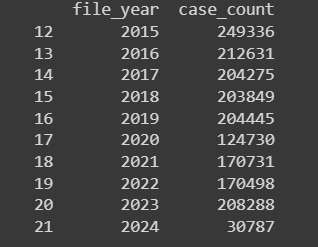

In [ ]:

unique_party_types = party_assignment_df['party_type'].unique()

print(unique_party_types)

# **Question 2 - Who are the debt collectors?**

In [ ]:

# Filter party_assignment for plaintiffs
plaintiffs = party_assignment_df[party_assignment_df['party_type'] == 'Plaintiff']

# Merge with party_index to get party names
plaintiff_names = pd.merge(plaintiffs, party_index_df, left_on='party_id', right_on='post_id', how='left')

# Select relevant columns and drop duplicates to see unique plaintiff names
unique_plaintiffs = plaintiff_names[['party_name']].drop_duplicates()
plaintiff_names_array = unique_plaintiffs['party_name'].tolist()
plaintiff_names_str = "\n".join(plaintiff_names_array)
file_path = '/unique_plaintiff_names.txt'
with open(file_path, 'w') as file:
    file.write(plaintiff_names_str)

print(len(plaintiff_names_array))

# **Answer 2**
There are total 1139771 debt collectors, assuming "Plaintiff" represents debt collectors. The link to the file containing names of all the debt collectors:
https://drive.google.com/file/d/1s6575UrxAaryvXIxTa5Zrw-MfgPiMbgr/view?usp=drive_link